# Análisis exploratorio de datos 

## - Preparación de los datos

In [ ]:
# Cargue de todas las librerías.
from scipy import stats as st
from scipy.stats import levene
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargue de los archivos de datos en diferentes DataFrames
trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
# Visualización inicial del DF, revisión de valores nulos y duplicados
trips.info()
print()
print("Filas duplicadas:", trips.duplicated().sum())
print()
trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Filas duplicadas: 0



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# Visualización inicial del DF, revisión de valores nulos y duplicados
# Redondeo con round(2) los números a dos decimales.
dropoff.info()
dropoff['average_trips'] = dropoff['average_trips'].round(2)
print()
print("Filas duplicadas:", dropoff.duplicated().sum())
print()
dropoff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Filas duplicadas: 0



,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90


In [5]:
# Visualización inicial del DF, revisión de valores nulos y duplicados
# Cambio el tipo de dato de 'start_ts' de Object a Datetime.
weather.info()
weather['start_ts'] = pd.to_datetime(weather['start_ts'])
print()
print("Filas duplicadas:", weather.duplicated().sum())
print()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

Filas duplicadas: 197



,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [6]:
print('Top 10 de los barrios de destino')
dropoff.sort_values('average_trips', ascending=False).head(10)

Top 10 de los barrios de destino


,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


## - Gráficos 

<AxesSubplot:title={'center':'Número de viajes realizados por compañía ( 15 - 16 nov)'}, ylabel='Compañías de taxis'>

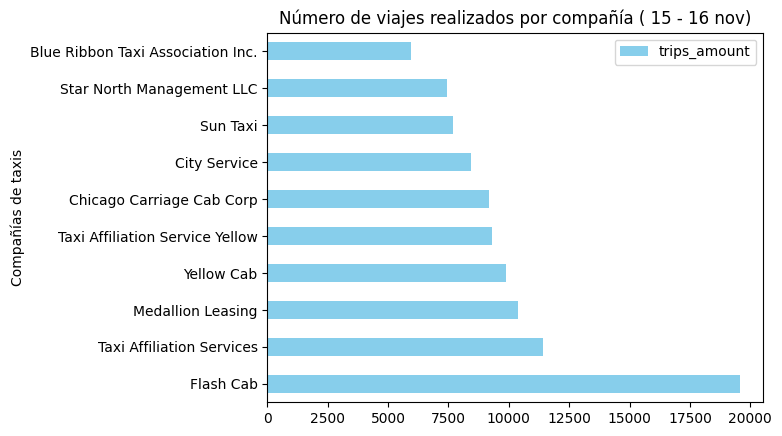

In [7]:
# Gráfico de barras para analizar
trips.sort_values('trips_amount', ascending=False).head(10).plot(kind='barh', 
                 x='company_name', 
                 y='trips_amount', 
                 xlabel='Compañías de taxis', 
                 ylabel='Número de viajes realizados', 
                 title='Número de viajes realizados por compañía ( 15 - 16 nov)',
                 color='skyblue')

<AxesSubplot:title={'center':'Viajes promedio finalizados por barrios'}, xlabel='Barrios de finalización (Chicago)', ylabel='Viajes promedio'>

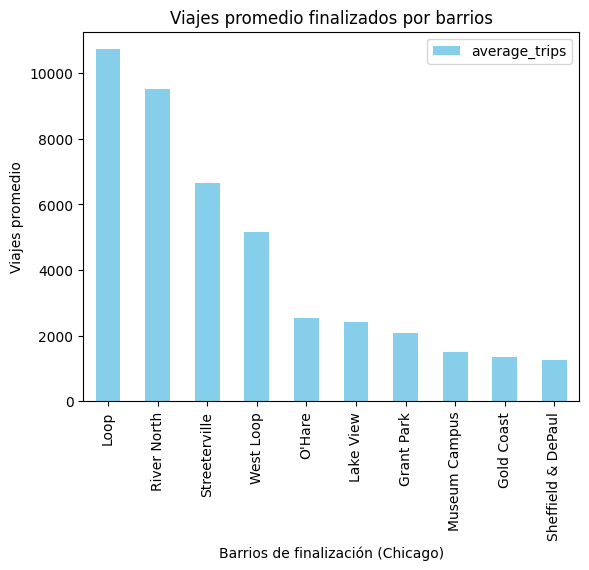

In [8]:
# Gráfico de barras para analizar 
dropoff.head(10).plot(kind='bar', 
                 x='dropoff_location_name', 
                 y='average_trips', 
                 xlabel='Barrios de finalización (Chicago)', 
                 ylabel='Viajes promedio', 
                 title='Viajes promedio finalizados por barrios',
                 color='skyblue')

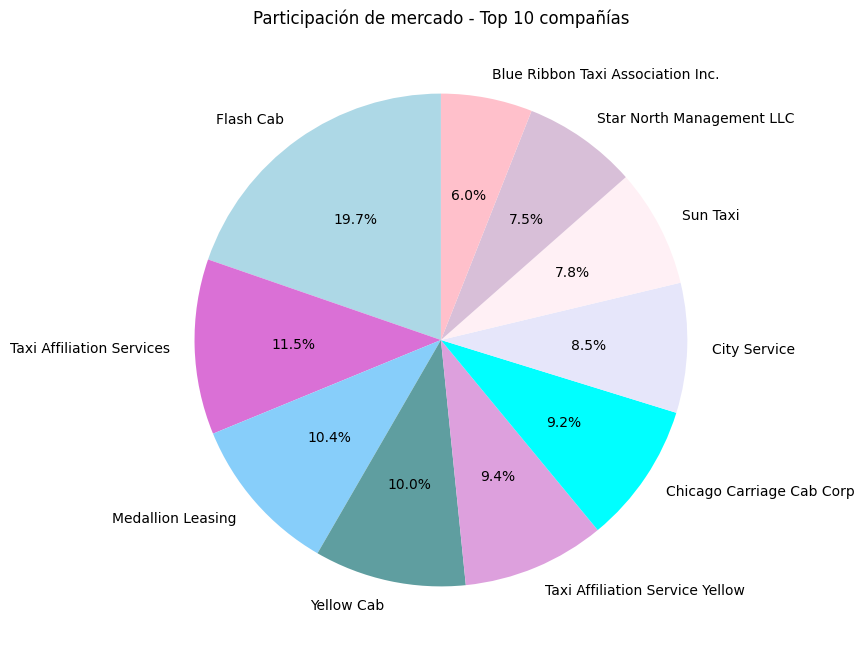

In [9]:
# Ver participación por Top 10
top_companies = trips.head(10)
plt.figure(figsize=(10, 8))
plt.pie(top_companies['trips_amount'], 
        labels=top_companies['company_name'], 
        autopct='%1.1f%%',
        startangle=90,
        colors= ['lightblue', 'orchid', 'lightskyblue', 'cadetblue', 'plum', 'aqua', 'lavender', 'lavenderblush', 'thistle', 'pink'])
plt.title('Participación de mercado - Top 10 compañías')
plt.show()

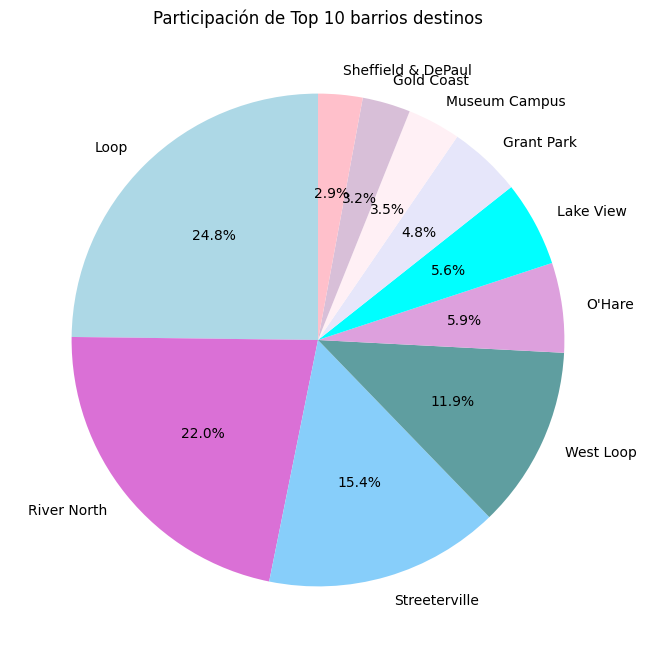

In [10]:
# Ver participación por Top 10
top_dropoff= dropoff.head(10)
plt.figure(figsize=(10, 8))
plt.pie(top_dropoff['average_trips'], 
        labels=top_dropoff['dropoff_location_name'], 
        autopct='%1.1f%%',
        startangle=90,
        colors= ['lightblue', 'orchid', 'lightskyblue', 'cadetblue', 'plum', 'aqua', 'lavender', 'lavenderblush', 'thistle', 'pink'])
plt.title('Participación de Top 10 barrios destinos')
plt.show()

## - Conclusiones

Durante la revisión inicial del dataset Weather, se identificaron 197 filas duplicadas. Sin embargo, estas no se eliminaron ya que el dataset no contiene un identificador único de viaje, por lo que la coincidencia entre 'start_ts', 'weather_conditions' y 'duration_seconds', no implica sea el mismo viaje registrado varias veces.
Esto, considerando que distintos pasajeros pueden haber realizado viajes a la misma hora aproximada y hacia el mismo destino (por lo que el clima sería igual), teniendo en cuenta también que hay barrios destinos bastante populares y frecuentes.
Por lo tanto, los duplicados probablemente representan observaciones reales repetidas (frecuencia de eventos) y eliminarlos podría sesgar la distribución de la duración de los viajes y afectar la prueba de hipótesis.

**Conclusiones del análisis exploratorio y los gráficos**

El análisis del número de viajes por compañía muestra que el mercado de taxis en Chicago está concentrado en unas pocas empresas líderes. Flash Cab presenta la mayor cantidad de viajes, teniendo casi el 20% de participación (analisandolo desde el top 10 de compañías). Otras compañías como Taxi Affiliation Services, Medallion Leasing y Yellow Cab también tienen una participación importante. Esto indica que el mercado no está distribuido de manera uniforme y que existen operadores dominantes.
El análisis de los barrios de finalización de viajes muestra que la mayor cantidad de trayectos termina en zonas como Loop, River North, Streeterville y West Loop (aproximadamente el 75% de participación sobre el top 10). Estas áreas corresponden a distritos financieros, comerciales y turísticos, lo que sugiere que los taxis son utilizados principalmente para desplazamientos laborales, turísticos y de ocio más que para transporte residencial.
En conjunto, los resultados indican que el uso del taxi en Chicago está asociado principalmente a la actividad económica y turística de la ciudad y que el mercado se encuentra dominado por un pequeño grupo de compañías principales.

    

# Prueba de hipótesis

_Hipótesis:_ "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [ ]:
# Prueba las hipótesis
# H_0 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos
# H_1 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

good_weather = weather[weather['weather_conditions'] == 'Good']
bad_weather = weather[weather['weather_conditions'] == 'Bad']

alpha = 0.05

levene_result = levene(good_weather['duration_seconds'], bad_weather['duration_seconds'])
if (levene_result.pvalue < alpha):
    print("Las varianzas son significativamente diferentes, se rechaza la hipótesis de igualdad de varianzas")
else:
    print("No se rechaza la hipótesis de igualdad de varianzas, se asume varianzas iguales")


results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=False)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula


Teniendo en cuenta la hipótesis que se quería probar, se procede a establecer la prueba con:

* Hipótesis nula = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos que los sábados en que hace buen clima.
* Hipótesis alternativa = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
* alpha = 0.05, eligiendo este nivel de significancia teniendo en cuenta que es el estándar porque proporciona un equilibrio adecuado entre ser demasiado permisivo y demasiado estricto.
* La prueba t de Student para muestras independientes porque se está comparando las medias de dos grupos distintos y no se asume que las varianzas sean iguales.

La prueba t mostró un valor p 6.738994326108734e-12 < 0.05, por lo tanto rechazamos la hipótesis nula. Existe evidencia estadística para afirmar que el clima influye significativamente en la duración de los viajes desde el Loop hasta el aeropuerto O'Hare los sábados.


In [27]:
# Duración promedio de los viajes según las condiciones climáticas
avg_good = good_weather['duration_seconds'].mean()/60
avg_bad = bad_weather['duration_seconds'].mean()/60
diff = avg_bad - avg_good

print('Duración promedio de viaje con buen clima:', avg_good.round())
print('Duración promedio de viaje con mal clima:', avg_bad.round())
print('Diferencia:', diff.round(), 'minutos')

Duración promedio de viaje con buen clima: 33.0
Duración promedio de viaje con mal clima: 40.0
Diferencia: 7.0 minutos


In [ ]:
# Gráfico de distribución de duración de viajes según condiciones climáticas
plt.figure(figsize=(8,5))

sns.histplot(
    data=weather,
    x='duration_seconds',
    hue='weather_conditions',
    bins=40,
    kde=True
)

plt.title('Distribución de duración de viajes según condiciones climáticas')
plt.xlabel('Duración del viaje (segundos)')
plt.ylabel('Frecuencia')

plt.savefig('duration_distribution.png', bbox_inches='tight')
plt.show()

Por último, después de analizar la prueba de hipótesis, se procede a calcular los promedios de viaje según las condiciones, encontrando que la duración promedio de los viajes es mayor durante condiciones climáticas adversas, lo que sugiere que la lluvia incrementa el tiempo de traslado entre el Loop y el aeropuerto O'Hare en aproximadamente 7 minutos posiblemente debido a menor velocidad del tráfico o mayor congestión.